In [31]:
import numpy as np
import pandas as pd
import recombination as rb
import timeit

n = 20
N = 2000000
sample = 70

Npoints = [500,5000,10000,50000,100000,200000,500000,800000,1000000,1500000,2000000]

# comment/uncomment if you want to try the symmetric/non symmeric case

################# SYMMETRIC
x = np.random.randn(N,n)
###########################

############# NON SYMMETRIC
# x = np.random.exponential(1., (N,int(n/2)))
# x = np.append(x,np.random.exponential(5., (N,int(n/2))),axis=1)
###########################

In [32]:
mean_t = 0.

time_rand = np.zeros((len(Npoints),sample))
iterations_rand = np.zeros((len(Npoints),sample))

min_t = np.zeros(len(Npoints))
max_t = np.zeros(len(Npoints))

for k in range(len(Npoints)):    
    print("N="+str(Npoints[k]))
    for i in range(sample):

        tic = timeit.default_timer()
        w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_Mor_reset(
                        x[:Npoints[k],:]-np.mean(x[:Npoints[k],:],0), n**3)
        time_rand[k,i] = (timeit.default_timer()-tic)*1000
        iterations_rand[k,i] = iterations

        mean_t += time_rand[k,i]
        print("sample = ", i)
        print("time = ", time_rand[k,i], "ms")
        print("mean time = ", mean_t/(i+1), "ms")
    print("N="+str(Npoints[k]))
    mean_t = 0.
    
mean_t = np.mean(time_rand,1)
min_t = np.min(time_rand,1)
max_t = np.max(time_rand,1)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

N=500
sample =  0
time =  13.683163999985481 ms
mean time =  13.683163999985481 ms
sample =  1
time =  9.493820999978198 ms
mean time =  11.58849249998184 ms
sample =  2
time =  5.560486000149467 ms
mean time =  9.579157000037716 ms
sample =  3
time =  5.617765999886615 ms
mean time =  8.58880924999994 ms
sample =  4
time =  8.211464999931195 ms
mean time =  8.513340399986191 ms
sample =  5
time =  3.9509069999894564 ms
mean time =  7.752934833320069 ms
sample =  6
time =  6.367369999907169 ms
mean time =  7.554996999975368 ms
sample =  7
time =  5.1266369998757 ms
mean time =  7.25145199996291 ms
sample =  8
time =  5.238479999889023 ms
mean time =  7.027788444399145 ms
sample =  9
time =  11.035158000140655 ms
mean time =  7.428525399973296 ms
sample =  10
time =  6.090555999890057 ms
mean time =  7.306891818147547 ms
sample =  11
time =  5.321610999999393 ms
mean time =  7.141451749968534 ms
sample =  12
time =  8.004862999996476 ms
mean time =  7.207867999970683 ms
sample =  13
tim

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:368: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)
/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:393: RuntimeWarning: invalid value encountered in greater
  tmp_2 = np.transpose(AX>0)


sample =  27
time =  8.142609000060475 ms
mean time =  7.132790214273298 ms
sample =  28
time =  7.931191000125182 ms
mean time =  7.160321275854397 ms
sample =  29
time =  8.526492000100916 ms
mean time =  7.205860299995948 ms
sample =  30
time =  9.31249499990372 ms
mean time =  7.273816258057488 ms
sample =  31
time =  7.3904709997805185 ms
mean time =  7.277461718736333 ms
sample =  32
time =  12.061916999982714 ms
mean time =  7.422445212107435 ms
sample =  33
time =  6.992832999912935 ms
mean time =  7.409809558807598 ms
sample =  34
time =  7.87513799991757 ms
mean time =  7.423104657125025 ms
sample =  35
time =  6.084366000095542 ms
mean time =  7.38591747220754 ms
sample =  36
time =  8.255888000121558 ms
mean time =  7.409430189178189 ms
sample =  37
time =  7.163340000033713 ms
mean time =  7.402954131569124 ms
sample =  38
time =  4.626170999927126 ms
mean time =  7.331754564091123 ms
ERROR: NO convergence
sample =  39
time =  17.5567679998494 ms
mean time =  7.58737989998

In [33]:
from Maalouf_Jubran_Feldman import Fast_Caratheodory

sample_FC = 10
time_FC = np.zeros((len(Npoints),sample_FC))

for k in range(len(Npoints)):
    print("N="+str(Npoints[k]))
    for i in range(sample_FC):
        tic = timeit.default_timer()
        Fast_Caratheodory(x[:Npoints[k],:],np.ones(Npoints[k]),n+1)
        time_FC[k,i] = (timeit.default_timer()-tic)*1000

print("mean FC = ", np.mean(time_FC,1), " ms")
print("std FC = ", np.std(time_FC,1))

N=500
N=5000
N=10000
N=50000
N=100000
N=200000
N=500000
N=800000
N=1000000
N=1500000
N=2000000
mean FC =  [ 17.8221431  31.5620165  34.9235858  56.3071769  75.2226501 124.2170549
 280.9871391 360.1877132 519.3312036 791.3947457 955.5333414]  ms
std FC =  [ 1.46017882  3.26565321  0.6800584   5.30552125  1.23370139  5.84191168
  9.6226294  15.69254146  6.61352987  5.54489827  9.89672616]


In [34]:
print("Probability to be faster = ", 
            np.sum(time_rand<np.mean(time_FC,1)[np.newaxis].T,1)/sample*100, "%")
print("Probability to be 4x faster = ", 
            np.sum(time_rand<np.mean(time_FC,1)[np.newaxis].T/4,1)/sample*100, "%")

print("Standard deviation = ", np.std(time_rand,1))

Probability to be faster =  [100.         100.         100.          20.          25.71428571
  14.28571429  21.42857143   2.85714286   1.42857143   4.28571429
   7.14285714] %
Probability to be 4x faster =  [ 5.71428571 10.          2.85714286  0.          1.42857143  0.
  0.          0.          0.          0.          0.        ] %
Standard deviation =  [   2.72381125    2.69219201    5.09289345   31.91149198   80.09401606
  124.90315889  342.31298816  485.89759836 1052.97823999 1569.75876876
 1996.05262928]


In [35]:
mean_t = 0.
time_log = np.zeros((len(Npoints),sample))
iterations_rand = np.zeros((len(Npoints),sample))

min_t = np.zeros(len(Npoints))
max_t = np.zeros(len(Npoints))

for k in range(len(Npoints)):    
    print("N="+str(Npoints[k]))
    for i in range(sample):
        x_cp = np.copy(x)
        
        tic = timeit.default_timer()
        rb.recomb_log(x_cp[:Npoints[k],:])
        time_log[k,i] = (timeit.default_timer()-tic)*1000

        mean_t += time_log[k,i]
        print("sample = ", i)
        print("time = ", time_log[k,i], "ms")
        print("mean time = ", mean_t/(i+1), "ms")
    
    print("N="+str(Npoints[k]))
    mean_t = 0.
    
mean_t = np.mean(time_log,1)
min_t = np.min(time_log,1)
max_t = np.max(time_log,1)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

N=500
sample =  0
time =  6.5278080001007766 ms
mean time =  6.5278080001007766 ms
sample =  1
time =  4.857829999764363 ms
mean time =  5.69281899993257 ms
sample =  2
time =  9.329471000000922 ms
mean time =  6.905036333288687 ms
sample =  3
time =  4.579252999974415 ms
mean time =  6.323590499960119 ms
sample =  4
time =  5.771605000063573 ms
mean time =  6.21319339998081 ms
sample =  5
time =  8.315533999848412 ms
mean time =  6.563583499958743 ms
sample =  6
time =  6.8984289996478765 ms
mean time =  6.611418571342905 ms
sample =  7
time =  5.492371000400453 ms
mean time =  6.471537624975099 ms
sample =  8
time =  7.234154999878228 ms
mean time =  6.556272888853225 ms
sample =  9
time =  6.054771999970399 ms
mean time =  6.506122799964942 ms
sample =  10
time =  7.519778000187216 ms
mean time =  6.598273272712421 ms
sample =  11
time =  5.7670539999890025 ms
mean time =  6.52900499998547 ms
sample =  12
time =  5.161811000107264 ms
mean time =  6.423836230764069 ms
sample =  13
ti

/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


sample =  25
time =  6.548118999944563 ms
mean time =  8.704149153817735 ms
sample =  26
time =  7.519410999975662 ms
mean time =  8.660269962934695 ms
sample =  27
time =  6.710049000048457 ms
mean time =  8.590619214260187 ms
sample =  28
time =  11.214735000066867 ms
mean time =  8.6811059654949 ms
sample =  29
time =  6.979284999943047 ms
mean time =  8.624378599976504 ms
sample =  30
time =  6.223045000297134 ms
mean time =  8.5469162257933 ms
sample =  31
time =  5.689967999842338 ms
mean time =  8.457636593732332 ms
sample =  32
time =  5.569511999965471 ms
mean time =  8.370117666648488 ms
sample =  33
time =  6.708723999963695 ms
mean time =  8.32125314704011 ms
sample =  34
time =  5.649566000101913 ms
mean time =  8.244919228556162 ms
sample =  35
time =  6.059598999854643 ms
mean time =  8.184215888870009 ms
sample =  36
time =  4.342743000051996 ms
mean time =  8.080392297280333 ms
sample =  37
time =  5.640115000005608 ms
mean time =  8.01617447366784 ms
sample =  38
time

In [36]:
mean_t = 0.

time_TL = np.zeros((len(Npoints),sample_FC))
min_t = np.zeros(len(Npoints))
max_t = np.zeros(len(Npoints))

for k in range(len(Npoints)):    
    print("N="+str(Npoints[k]))
    for i in range(sample_FC):
        x_cp = np.copy(x)
        
        tic = timeit.default_timer()  
        rb.Tchernychova_Lyons(x_cp[:Npoints[k],:])
        time_TL[k,i] = (timeit.default_timer()-tic)*1000

        mean_t += time_TL[k,i]
        print("sample = ", i)
        print("time = ", time_TL[k,i], "ms")
        print("mean time = ", mean_t/(i+1), "ms")
    
    print("N="+str(Npoints[k]))
    mean_t = 0.
    
mean_t = np.mean(time_TL,1)
min_t = np.min(time_TL,1)
max_t = np.max(time_TL,1)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

N=500


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:727: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  0
time =  8.988789999875735 ms
mean time =  8.988789999875735 ms
sample =  1
time =  9.21139399997628 ms
mean time =  9.100091999926008 ms
sample =  2
time =  7.395348000045487 ms
mean time =  8.531843999965835 ms
sample =  3
time =  7.513550000112446 ms
mean time =  8.277270500002487 ms
sample =  4
time =  7.365493000179413 ms
mean time =  8.094915000037872 ms
sample =  5
time =  7.194995999725506 ms
mean time =  7.944928499985811 ms
sample =  6
time =  7.342619000155537 ms
mean time =  7.8588842857243435 ms
sample =  7
time =  7.061475999762479 ms
mean time =  7.75920824997911 ms
sample =  8
time =  7.076522999795998 ms
mean time =  7.6833543332920975 ms
sample =  9
time =  7.465828000022157 ms
mean time =  7.661601699965104 ms
N=500
N=5000
sample =  0
time =  13.701650999792037 ms
mean time =  13.701650999792037 ms
sample =  1
time =  11.848222000025999 ms
mean time =  12.774936499909018 ms
sample =  2
time =  12.958203999914986 ms
mean time =  12.836025666577674 ms
sample

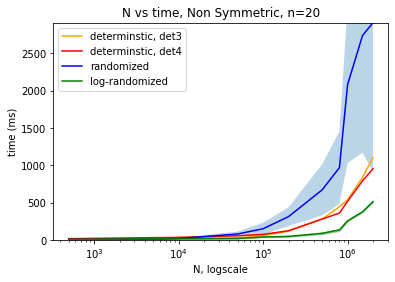

In [40]:
import matplotlib.pyplot as plt

plt.plot(Npoints,np.mean(time_TL,1), '-', label="determinstic, det3", color='orange')
plt.plot(Npoints,np.mean(time_FC,1), '-', label="determinstic, det4", color='red')

plt.plot(Npoints,np.mean(time_rand,1), '-', label="optimized-reset", color='blue')
error = np.std(time_rand,axis=1)
plt.fill_between(Npoints, 
                 np.mean(time_rand,1)-error, 
                 np.mean(time_rand,1)+error, 
                 alpha=0.3)

plt.plot(Npoints,np.mean(time_log,1), '-', label="log-randomized", color='green')
plt.fill_between(Npoints, 
                 np.mean(time_log,1)-np.std(time_log,1), 
                 np.mean(time_log,1)+np.std(time_log,1), 
                 alpha=0.3, color='green')

plt.xlabel('N, logscale')
plt.ylabel('time (ms)')
plt.title('N vs time, Non Symmetric, n='+str(n))
# plt.axvline(2*n, 0, max(Npoints), color="red")
plt.xscale('log') 
# plt.yscale('log') 
# plt.ylim([0,np.max(np.mean(time_rand,1))])
plt.legend()

# fig.tight_layout()
# plt.savefig('NONSynthetic_Nvsn_n20_logx_70samples.pdf', bbox_inches='tight')
plt.show()
